In [ ]:
!pip install wbgapi
!pip install seaborn
!pip install pandas
!pip install matplotlib

# Expenditure on education as percentage of GDP

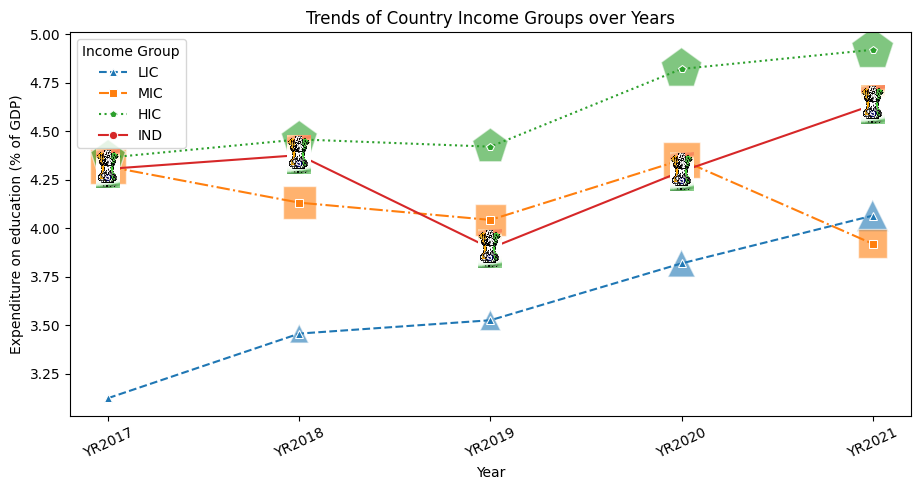

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

indicators = ['SE.XPD.TOTL.GD.ZS']
exp_lic = wb.data.DataFrame(indicators, economy= wb.income.members('LIC'), time=range(2017, 2022)).dropna()
exp_mic = wb.data.DataFrame(indicators, economy= wb.income.members('MIC'), time=range(2017, 2022)).dropna()
exp_hic = wb.data.DataFrame(indicators, economy= wb.income.members('HIC'), time=range(2017, 2022)).dropna()
exp_ind = wb.data.DataFrame(indicators, ['IND'], time=range(2017, 2022))

import pandas as pd
# Calculate the median for each year in each dataset
median_lic = exp_lic.median(axis=0)
median_mic = exp_mic.median(axis=0)
median_hic = exp_hic.median(axis=0)
median_ind = exp_ind.median(axis=0)

# Create a new DataFrame with the median values for each year
df = pd.DataFrame({
    'LIC': median_lic,
    'MIC': median_mic,
    'HIC': median_hic,
    'IND': median_ind
})

# Rename the index to 'Year'
df.index.name = 'Year'
df = df.reset_index()

# Image of India's emblem
india_flag = mpimg.imread('india.jpg')

# Function to place India's flag as markers
def place_flag_on_plot(ax, x_data, y_data, image):
    for x, y in zip(x_data, y_data):
        im = OffsetImage(image, zoom=0.05)
        ab = AnnotationBbox(im, (x, y), frameon=False)
        ax.add_artist(ab)

# Melt the dataframe for seaborn
df_melted = df.melt(id_vars='Year', value_vars=['LIC', 'MIC', 'HIC', 'IND'],
                    var_name='Income Group', value_name='Value')

# Set the style for each Income Group
style_dict = {
    'LIC': {'marker': '^', 'linestyle': '--'},   # Triangle for LIC
    'MIC': {'marker': 's', 'linestyle': '-.'},   # Square for MIC
    'HIC': {'marker': 'p', 'linestyle': ':'},    # Pentagon for HIC
    'IND': {'marker': 'o', 'linestyle': '-'}     # Circle for IND
}

# Normalize the bubble size
max_value = df_melted['Value'].max()
min_value = df_melted['Value'].min()
df_melted['Bubble Size'] = (df_melted['Value'] - min_value) / (max_value - min_value) * 1000  # Scale from 0 to 1000

# Plot with different marker and linestyle
fig, ax = plt.subplots(figsize=(10, 5))
for income_group in df_melted['Income Group'].unique():
    subset = df_melted[df_melted['Income Group'] == income_group]

    # Line plot for trends
    sns.lineplot(data=subset, x='Year', y='Value', label=income_group,
                 marker=style_dict[income_group]['marker'],
                 linestyle=style_dict[income_group]['linestyle'], ax=ax)

    # If it's India, replace bubbles with flag
    if income_group == 'IND':
        place_flag_on_plot(ax, subset['Year'], subset['Value'], india_flag)
    else:
        # Adding bubbles (scatter plot) for data points without legend
        ax.scatter(subset['Year'], subset['Value'],
                   s=subset['Bubble Size'],  # Bubble size adjusted based on value
                   alpha=0.6, edgecolors='w', marker=style_dict[income_group]['marker'])

plt.title('Trends of Country Income Groups over Years')
plt.xlabel('Year')
plt.ylabel('Expenditure on education (% of GDP)')
plt.legend(title='Income Group')
plt.xticks(rotation=25)
plt.tight_layout()

plt.show()

# Teacher training

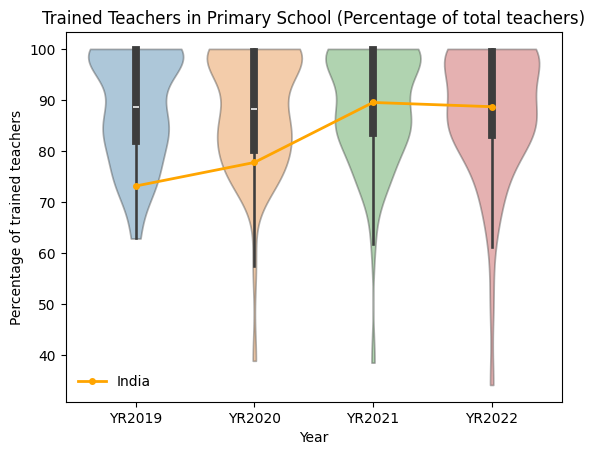

In [ ]:
import wbgapi as wb
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

indicators = ['SE.PRM.TCAQ.ZS']
trained_teachers_primary_world = wb.data.DataFrame(indicators, time=range(2019, 2023))
trained_teachers_primary_world.dropna(inplace=True)
trained_teachers_primary_india = wb.data.DataFrame(indicators, ['IND'], time=range(2019, 2023))

sns.violinplot(trained_teachers_primary_world, alpha=0.4, cut=0)
plt.plot(trained_teachers_primary_india.T, color='orange', linewidth=2, marker='o', markersize=4, label='India')

plt.title('Trained Teachers in Primary School (Percentage of total teachers)')
plt.ylabel('Percentage of trained teachers')
plt.xlabel('Year')

plt.legend(loc='lower left', frameon=False)
plt.show()

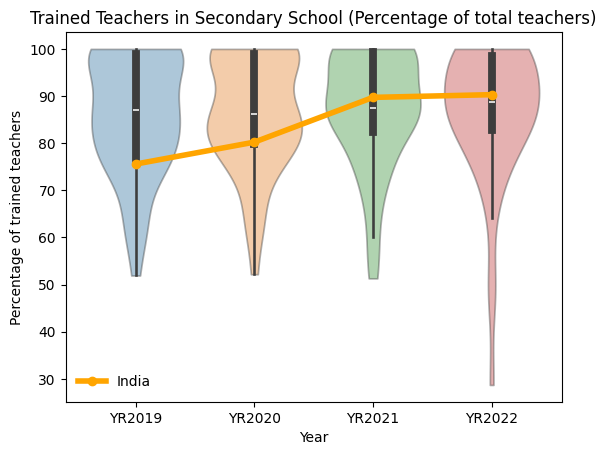

In [ ]:
import wbgapi as wb
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

indicators = ['SE.SEC.TCAQ.ZS']
trained_teachers_primary_world = wb.data.DataFrame(indicators, time=range(2019, 2023))
trained_teachers_primary_world.dropna(inplace=True)
trained_teachers_primary_india = wb.data.DataFrame(indicators, ['IND'], time=range(2019, 2023))

sns.violinplot(trained_teachers_primary_world, alpha=0.4, cut=0)
plt.plot(trained_teachers_primary_india.T, color='orange', linewidth=4, marker='o', markersize=6, label='India')

plt.title('Trained Teachers in Secondary School (Percentage of total teachers)')
plt.ylabel('Percentage of trained teachers')
plt.xlabel('Year')

plt.legend(loc='lower left', frameon=False)
plt.show()

# Enrollment

In [ ]:
import pandas as pd
import wbgapi as wb
# Get enrollment data for the world
enrollment_world = wb.data.DataFrame(['SE.PRM.CUAT.ZS'], time=range(2017, 2022))

# Get enrollment data for India
enrollment_india = wb.data.DataFrame(['SE.PRM.CUAT.ZS'], economy=['IND'], time=range(2017, 2022))


# Calculate the median for each year in the world data
median_world = enrollment_world.median(axis=0)

# Calculate the median for each year in the India data
median_india = enrollment_india.median(axis=0)

# Create a new DataFrame with the median values for each year for world and India data
median_df = pd.DataFrame({
    'World': median_world,
    'India': median_india
})

# Rename the index to 'Year'
median_df.index.name = 'Year'
prm_enr_df = median_df.reset_index()
print(prm_enr_df)

In [ ]:
import pandas as pd
# Get enrollment data for the world
enrollment_world = wb.data.DataFrame(['SE.SEC.ENRR'], time=range(2017, 2022))

# Get enrollment data for India
enrollment_india = wb.data.DataFrame(['SE.SEC.ENRR'], economy=['IND'], time=range(2017, 2022))


# Calculate the median for each year in the world data
median_world = enrollment_world.median(axis=0)

# Calculate the median for each year in the India data
median_india = enrollment_india.median(axis=0)

# Create a new DataFrame with the median values for each year for world and India data
median_df = pd.DataFrame({
    'World': median_world,
    'India': median_india
})

# Rename the index to 'Year'
median_df.index.name = 'Year'
sec_enr_df = median_df.reset_index()
print(sec_enr_df)

In [ ]:
import pandas as pd
# Get enrollment data for the world
enrollment_world = wb.data.DataFrame(['SE.TER.ENRR'], time=range(2017, 2022))

# Get enrollment data for India
enrollment_india = wb.data.DataFrame(['SE.TER.ENRR'], economy=['IND'], time=range(2017, 2022))


# Calculate the median for each year in the world data
median_world = enrollment_world.median(axis=0)

# Calculate the median for each year in the India data
median_india = enrollment_india.median(axis=0)

# Create a new DataFrame with the median values for each year for world and India data
median_df = pd.DataFrame({
    'World': median_world,
    'India': median_india
})

# Rename the index to 'Year'
median_df.index.name = 'Year'
ter_enr_df = median_df.reset_index()
print(ter_enr_df)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Prepare data for heatmap
df_heatmap = pd.DataFrame({
    'Year': ['YR2017', 'YR2018', 'YR2019', 'YR2020', 'YR2021'],
    'Primary World': [70.662895, 69.225098, 72.214172, 74.134590, 51.687031],
    'Primary India': [60.504066, 60.650562, 62.810837, 61.088936, 51.687031],
    'Secondary World': [90.684021, 91.381489, 92.586826, 91.859993, 91.496109],
    'Secondary India': [74.597267, 75.784790, 75.525581, 75.109001, 78.063004],
    'Tertiary World': [41.117025, 41.616329, 43.507092, 45.929909, 54.247082],
    'Tertiary India': [27.909000, 28.532000, 29.023001, 29.820000, 31.573999]
})

# Set the index to 'Year'
df_heatmap.set_index('Year', inplace=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_heatmap, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap of Enrollment across Years and Education Levels')
plt.xticks(rotation=25)
plt.show()

# Educational attainment

In [ ]:
import wbgapi as wb
import pandas as pd

# Get educational attainment data for the world
edu_attainment_world = wb.data.DataFrame(['SE.PRM.CUAT.ZS'], time=range(2015, 2023))

# Get educational attainment data for India
edu_attainment_india = wb.data.DataFrame(['SE.PRM.CUAT.ZS'], economy=['IND'], time=range(2015, 2023))

# Calculate the median for each year in the world data
median_world = edu_attainment_world.median(axis=0)

# Extract India's data as a Series
india_data = edu_attainment_india.squeeze() # Convert DataFrame to Series


# Create a new DataFrame with the median values for each year for world and India data
primary_median_df = pd.DataFrame({
    'World': median_world,
    'India': india_data  # Use the extracted India data Series
})

# Rename the index to 'Year'
primary_median_df.index.name = 'Year'
primary_median_df.dropna(inplace=True)
print(primary_median_df)

In [ ]:
import wbgapi as wb
import pandas as pd

# Get educational attainment data for the world
edu_attainment_world = wb.data.DataFrame(['SE.SEC.CUAT.UP.ZS'], time=range(2015, 2023))

# Get educational attainment data for India
edu_attainment_india = wb.data.DataFrame(['SE.SEC.CUAT.UP.ZS'], economy=['IND'], time=range(2015, 2023))

# Calculate the median for each year in the world data
median_world = edu_attainment_world.median(axis=0)

# Extract India's data as a Series
india_data = edu_attainment_india.squeeze() # Convert DataFrame to Series


# Create a new DataFrame with the median values for each year for world and India data
sec_median_df = pd.DataFrame({
    'World': median_world,
    'India': india_data  # Use the extracted India data Series
})

# Rename the index to 'Year'
sec_median_df.index.name = 'Year'
sec_median_df.dropna(inplace=True)

print(sec_median_df)

In [ ]:
import wbgapi as wb
import pandas as pd

# Get educational attainment data for the world
edu_attainment_world = wb.data.DataFrame(['SE.TER.CUAT.BA.ZS'], time=range(2015, 2024))

# Get educational attainment data for India
edu_attainment_india = wb.data.DataFrame(['SE.TER.CUAT.BA.ZS'], economy=['IND'], time=range(2015, 2024))

# Calculate the median for each year in the world data
median_world = edu_attainment_world.median(axis=0)

# Extract India's data as a Series
india_data = edu_attainment_india.squeeze() # Convert DataFrame to Series


# Create a new DataFrame with the median values for each year for world and India data
ter_median_df = pd.DataFrame({
    'World': median_world,
    'India': india_data  # Use the extracted India data Series
})

# Rename the index to 'Year'
ter_median_df.index.name = 'Year'
ter_median_df.dropna(inplace=True)
print(ter_median_df)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data for primary, secondary, and tertiary education
primary_data = {
    'Year': ['YR2016', 'YR2018', 'YR2019', 'YR2020', 'YR2022'],
    'World': [93.192127, 91.099998, 92.929054, 95.511620, 96.095657],
    'India': [56.684181, 59.563702, 60.704010, 61.390739, 62.822861],
    'Level': ['Primary'] * 5
}
secondary_data = {
    'Year': ['YR2018', 'YR2020', 'YR2022'],
    'World': [50.416988, 63.557665, 66.629997],
    'India': [32.343349, 31.709450, 31.613871],
    'Level': ['Secondary'] * 3
}
tertiary_data = {
    'Year': ['YR2016', 'YR2018', 'YR2019', 'YR2020', 'YR2022'],
    'World': [17.403700, 16.149946, 15.515270, 20.186449, 20.973406],
    'India': [10.14317, 10.78251, 12.01604, 12.22345, 12.14107],
    'Level': ['Tertiary'] * 5
}

# Convert to DataFrames and concatenate
df_primary = pd.DataFrame(primary_data)
df_secondary = pd.DataFrame(secondary_data)
df_tertiary = pd.DataFrame(tertiary_data)

# Combine the three datasets
df = pd.concat([df_primary, df_secondary, df_tertiary])

# Melt the DataFrame to use Seaborn's FacetGrid (long-form DataFrame)
df_melted = df.melt(id_vars=['Year', 'Level'], value_vars=['World', 'India'],
                    var_name='Region', value_name='Attainment')

# Create a FacetGrid with each facet for different education levels
g = sns.FacetGrid(df_melted, col='Level', hue='Region', height=4, aspect=1.5)

# Map a lineplot for each facet
g.map(sns.lineplot, 'Year', 'Attainment', marker='o')

# Add a legend for each facet
g.add_legend()

# Adjust the title and labels
g.set_axis_labels('Year', 'Attainment (% of people above 25 years)')
g.set_titles('Atleast {col_name} Education')

# Rotate x-axis labels for readability
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()

# Distribution of years of compulsory education

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

Text(0, 0.5, 'Years of Compulsory Education')

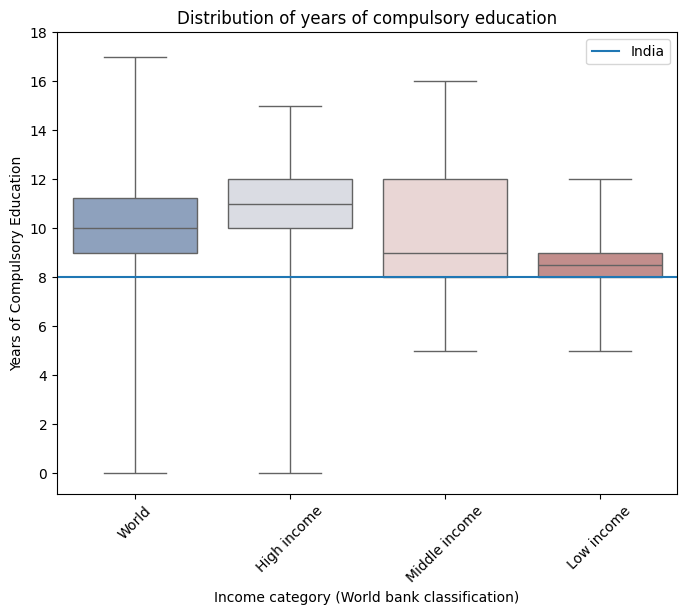

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import wbgapi as wb

# Get data about legally mandated years of education for different categories of countries for 2023
world_2023 = wb.data.DataFrame("SE.COM.DURS", time=2023).dropna()
edu_high_income_2023 = wb.data.DataFrame("SE.COM.DURS", time=2023, economy=wb.income.members("HIC")).dropna()
edu_middle_income_2023 = wb.data.DataFrame("SE.COM.DURS", time=2023, economy= wb.income.members("MIC")).dropna()
edu_low_income_2023 = wb.data.DataFrame("SE.COM.DURS", time=2023, economy= wb.income.members("LIC")).dropna()

# Combine dataframes with an identifier column and a unique index
all_dfs = [world_2023, edu_high_income_2023, edu_middle_income_2023,  edu_low_income_2023]
labels = ['World', 'High income', 'Middle income',  'Low income']

# Convert into a dataframe to make it easier for Seaborn to plot
data_list = []
for label, df in zip(labels, all_dfs):
    df_temp = df.reset_index()
    df_temp["category"] = label
    df_temp["UID"] = df_temp["economy"] + f"_{label}"
    data_list.append(df_temp[["SE.COM.DURS", "category", "UID"]])
data = pd.concat(data_list, ignore_index=True)

# Plot boxplots for each category
fig, ax = plt.subplots(figsize=(8, 6), facecolor='none')
sns.boxplot(x="category", y="SE.COM.DURS", data=data, palette="vlag", hue="category", whis=[0, 100])
# Overlay with line for India
plt.axhline(y=world_2023.loc["IND", "SE.COM.DURS"], label="India")
plt.yticks([i for i in range(0, 20, 2)])
plt.legend()

plt.title("Distribution of years of compulsory education")
plt.xlabel("Income category (World bank classification)")
plt.xticks(rotation=45)
plt.ylabel("Years of Compulsory Education")

# Variation in number of mandated years of schooling

Some countries have introduced new legislation to either establish or increase the number of years of mandated schooling. A distribution across the change in compulsory years of schooling from 2000 to 2023 is shown below.

Text(0.5, 1.0, 'Change in number of years of mandatory education (2000-2023)')

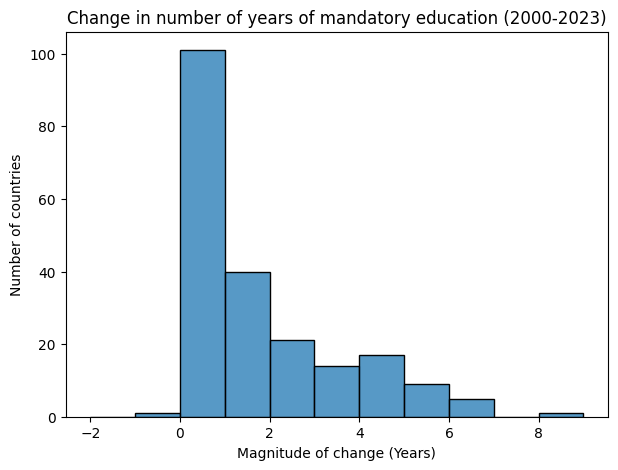

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import wbgapi as wb

# Fetch data and compute the difference between number of years of compulsory schooling
# for all countries between 2000 and 2023
world_compulsory_education = wb.data.DataFrame("SE.COM.DURS", time=[2000, 2023]).dropna()
world_compulsory_education["change"] = world_compulsory_education["YR2023"] - world_compulsory_education["YR2000"]
change_data = world_compulsory_education["change"].reset_index()

# Plot results to show distribution
fig, ax = plt.subplots(figsize=(7, 5), facecolor="none")
sns.histplot(data=change_data, x="change", bins=[i for i in range(-2, 10)])
plt.xlabel("Magnitude of change (Years)")
plt.ylabel("Number of countries")
plt.title("Change in number of years of mandatory education (2000-2023)")

# Literacy rates

Literacy rate distribution for all countries as of 2022

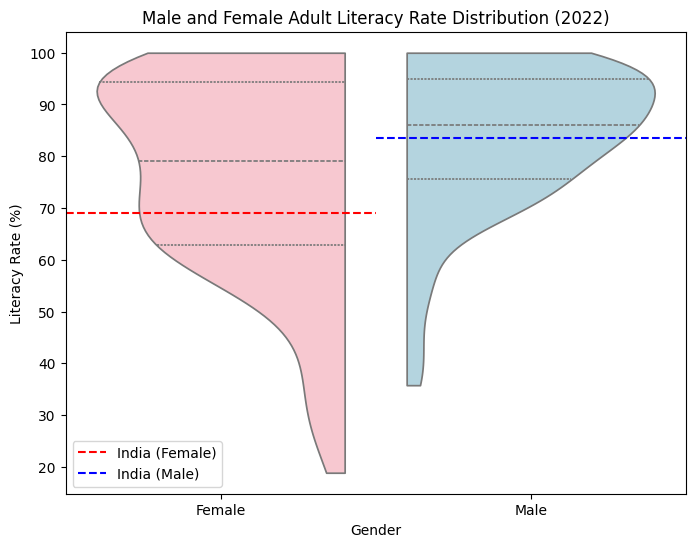

In [ ]:
import wbgapi as wb
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

female_literacy = wb.data.DataFrame("SE.ADT.LITR.FE.ZS", time=range(1990, 2023))
male_literacy = wb.data.DataFrame("SE.ADT.LITR.MA.ZS",time = range(1990, 2023))

india_female_literacy = female_literacy.loc["IND", "YR2022"]
india_male_literacy = male_literacy.loc["IND", "YR2022"]

# Extract YR2022 data for both male and female literacy
female_literacy_2022 = female_literacy.loc[:, 'YR2022']
male_literacy_2022 = male_literacy.loc[:, 'YR2022']

# Create a new DataFrame for plotting
plot_data = pd.DataFrame({'Literacy': list(female_literacy_2022) + list(male_literacy_2022),
                         'Gender': ['Female'] * len(female_literacy_2022) + ['Male'] * len(male_literacy_2022)})

fig, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(x='Gender', y='Literacy', data=plot_data, split=True, inner='quart',
               palette={'Female': 'pink', 'Male': 'lightblue'}, cut=0, ax=ax, hue="Gender")

# Get the x-coordinates for the lines
x_coords = ax.get_xticks()  # Assuming x-axis ticks are at 0 and 1 for Female and Male

# Draw the lines
ax.axhline(y=india_female_literacy, xmin=x_coords[0] / 2, xmax=(x_coords[1] + x_coords[0]) / 2, color='red', linestyle='--', label="India (Female)")
ax.axhline(y=india_male_literacy, xmin=(x_coords[1] + x_coords[0]) / 2, xmax=(x_coords[1] + 1) / 2, color='blue', linestyle='--', label="India (Male)")

# Adjust the plot to move the violins closer together
plt.subplots_adjust(wspace=0.05)

plt.title('Male and Female Adult Literacy Rate Distribution (2022)')
plt.xlabel('Gender')
plt.ylabel('Literacy Rate (%)')
plt.legend()

plt.show()